# Transposition, a bio-inspired operator

In [1]:
from evol_algorithm import *
import numpy as np
import math
import matplotlib.pyplot as plt

## Functions

In [2]:
def deJong(indiv):
    """
    quartic = DeJong 1
    domain = [-5.12; 5.12]
    minimum 0 at (0,....,0)
    """
    y = sum([ x**2 for x in indiv])
    return y

def rosenbrock(indiv):
    """
    quartic = DeJong 2
    domain = [-2.048; 2.048]
    minimum 0 at (1,....,1)
    """
#    y = sum([ (1 - x)**2 + 100*(???) for i,x in enumerate(indiv)])
# BISOGNA CAPIRE COME SCRIVERE X_i+1
    return y

def rastrigin(indiv):
    """
    rastrigin function
    domain = [-5.12, 5.12]
    minimum at (0,....,0)
    """
    n = len(indiv)
    A = 10
    return A * n + sum([x**2 - A * math.cos(2 * math.pi * x) for x in indiv])
    
def schwefel(indiv):    
    """
    schwefel function
    domain = [-500; 500]
    minimum at (420.9687,...,420.9687)
    """
    y = sum([-x * math.sin(math.sqrt(math.fabs(x))) for x in indiv])
    return y

def quartic(indiv):
    """
    quartic = DeJong 4
    domain = [-1.28; 1.28]
    minimum 0 at x = 0
    """
    y = sum([ (i+1) * x for i,x in enumerate(indiv)]) + random.uniform(0,1)
    return y

In [3]:
#def merito_r(indiv, dim, prec):
#    return rastrigin(phenotype(indiv, dim, prec))

def fit_rastrigin(dim, prec):
    def rastrigin(indiv):
        X = phenotype(indiv, dim, prec)
        n = len(X)
        A = 10
        return A * n + sum([x**2 - A * math.cos(2 * math.pi * x) for x in X])
    return rastrigin

def fit_schwefel(dim, prec):
    def schwefel(indiv):    
        X = phenotype(indiv, dim, prec)
        y = 420.968746*dim + sum([-x * math.sin(math.sqrt(math.fabs(x))) for x in X])
        return y
    return schwefel

def fit_dejong(dim,prec):
    def dejong(indiv):
        X = phenotype(indiv, dim, prec)
        n = len(X)
        return sum([ x**2 for x in X])
    return dejong

## Define parameters

In [4]:
# crossover rastrigin
numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 10
max_domain = 5.12
precision = 4

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

best_sea = sea(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)
print(best_sea[1])
print(phenotype(best_sea[0], dimensions, precision))

32.95184569141706
[1.0375, -1.0894, -2.0642, 1.0914, 1.9061, 1.8647, -0.9827, -1.9184, 1.0885, -0.0259]


In [12]:
# crossover schwefel
numb_generations = 20
size_pop = 500
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.03

dimensions = 3
max_domain = 500
precision = 4

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)
best_schwefel = sea(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_schwefel(dimensions, precision), pop)
print(best_schwefel[1])
print(phenotype(best_schwefel[0], dimensions, precision))
print(best_schwefel)

5.957945951567126
[421.0, 421.0, 421.0]
([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 5.957945951567126)


In [4]:
#rastring with CROSSOVER for plot

numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 3
max_domain = 5.12
precision = 4

size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

# plot di rastring con crossover
best_sea_for_plot = sea_for_plot(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

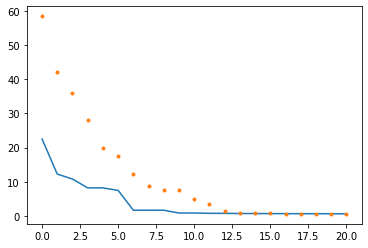

In [30]:
plt.plot(best_sea_for_plot[1])
plt.plot(best_sea_for_plot[2],'.')

In [4]:
#rastring with TRANSPOSITION for plot

numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 6
max_domain = 5.12
precision = 4

size_cromo = cromo_len(max_domain, precision)
recombination = transposition(3)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

# plot di rastring con transposition
best_sea_for_plot = sea_for_plot(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

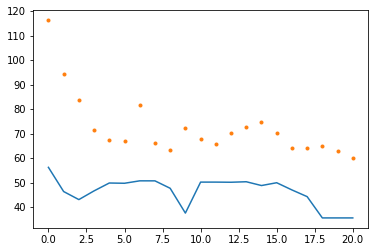

In [5]:
plt.plot(best_sea_for_plot[1])
plt.plot(best_sea_for_plot[2],'.')

In [5]:
sea_boa_file('test',3,numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

[(36.401506912114165, 41.4869412715643), (35.88015754315272, 41.31315814857715), (35.88015754315272, 47.800848390521956), (34.01322098291712, 38.154561960781926), (35.54820810937565, 42.332835298708666), (38.21589394278463, 42.09378646225899), (29.149147866342954, 34.328760796310895), (33.58533904975097, 35.31123172204388), (21.034790827963896, 30.691079779757057), (20.35395502365197, 30.451558560112385), (17.732216975721784, 25.268321807861298), (17.92337507125469, 25.223739748099188), (16.152358857555733, 25.601540604186024), (16.152358857555733, 25.601291651079652), (16.13025370888017, 25.591648613101444), (15.958258760889123, 24.759554224899414), (13.074890783668756, 23.61609487796711), (7.083956175509002, 21.50537853940578), (6.564827752277388, 21.291905257304236), (5.404661965164443, 20.583552166257267), (5.097058217363347, 20.2884692850247)]


([36.401506912114165,
  35.88015754315272,
  35.88015754315272,
  34.01322098291712,
  35.54820810937565,
  38.21589394278463,
  29.149147866342954,
  33.58533904975097,
  21.034790827963896,
  20.35395502365197,
  17.732216975721784,
  17.92337507125469,
  16.152358857555733,
  16.152358857555733,
  16.13025370888017,
  15.958258760889123,
  13.074890783668756,
  7.083956175509002,
  6.564827752277388,
  5.404661965164443,
  5.097058217363347],
 [41.4869412715643,
  41.31315814857715,
  47.800848390521956,
  38.154561960781926,
  42.332835298708666,
  42.09378646225899,
  34.328760796310895,
  35.31123172204388,
  30.691079779757057,
  30.451558560112385,
  25.268321807861298,
  25.223739748099188,
  25.601540604186024,
  25.601291651079652,
  25.591648613101444,
  24.759554224899414,
  23.61609487796711,
  21.50537853940578,
  21.291905257304236,
  20.583552166257267,
  20.2884692850247])